<a href="https://colab.research.google.com/github/dongcheol-noh/dongcheol-noh.github.io/blob/master/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

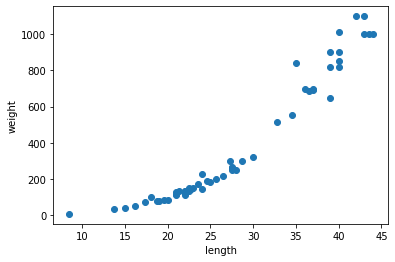

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

생선의 길이와 무게를 산점도로 나타내어 보았습니다

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


사이킷런을 통해서 데이터를 훈련데이터와 테스트데이터로 나누어 주었습니다

In [7]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


numpy의 reshape를 통해서 데이터를 2열로 만들어 주었습니다

In [10]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


reshape는 첫 칸에 -1을 넣으면 남은 데이터가 전부들어가므로 데이터 갯수를 외우지 않고 쉽게 재배열 해줄 수 있습니다

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


k-최근접이웃모델을 통해서 훈련데이터를 훈련시켰습니다

In [16]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


절대오류 값을 구해보았습니다

In [18]:
print(knr.score(train_input, train_target))

0.9698823289099254


정확도가 떨어진 모습입니다
훈련데이터가 테스트데이터보다 높게나왔으니 overfitting되었습니다

In [20]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k의 값을 3으로 해주고 훈련데이터를 훈련시켰습니다

In [23]:
print(knr.score(test_input, test_target))

0.9746459963987609


테스트데이터의 정확도도 훈련데이터와 크게 차이가 나지 않았습니다

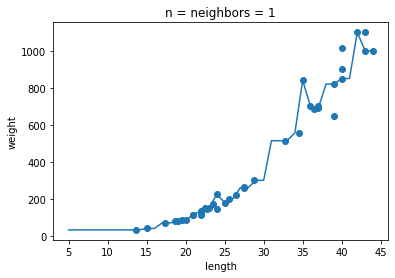

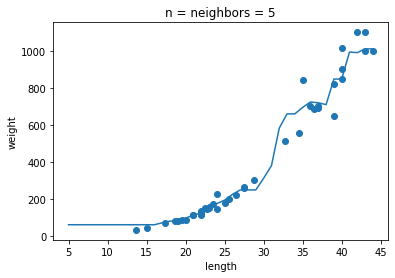

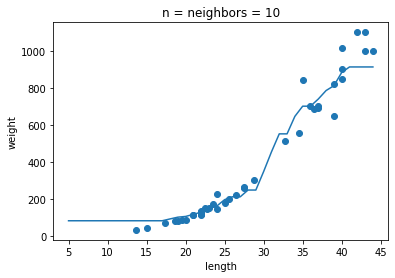

In [36]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1,1)
for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n = neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

(5,45)의 길이의 생선의 무게를 산점도로 나타내고 k-최근접회귀모델의 k값을 
1,5,10으로 변화시켜보았습니다. k값이 커질수록 단순화되는 모습을 볼 수있습니다